In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix
from sklearn import svm

%matplotlib inline

seed = 42

df = pd.read_csv("fertility.csv")
len(df)

100

In [2]:
df.describe(include = "all")

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
count,100,100.000000,100,100,100,100,100,100,100.000000,100
unique,4,NaN,2,2,2,3,5,3,NaN,2
top,spring,NaN,yes,no,yes,more than 3 months ago,hardly ever or never,never,NaN,Normal
freq,37,NaN,87,56,51,63,40,56,NaN,88
mean,NaN,30.110000,NaN,NaN,NaN,NaN,NaN,NaN,10.800000,NaN
std,NaN,2.246861,NaN,NaN,NaN,NaN,NaN,NaN,33.616975,NaN
min,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN
50%,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN
75%,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN


In [65]:
df["Season"] = df["Season"].astype('category').cat.codes
df["Childish diseases"] = df["Childish diseases"].astype('category').cat.codes
df["Accident or serious trauma"] = df["Accident or serious trauma"].astype('category').cat.codes
df["Surgical intervention"] = df["Surgical intervention"].astype('category').cat.codes
df["High fevers in the last year"] = df["High fevers in the last year"].astype('category').cat.codes
df["Frequency of alcohol consumption"] = df["Frequency of alcohol consumption"].astype('category').cat.codes
df["Smoking habit"] = df["Smoking habit"].astype('category').cat.codes
df["Smoking habit"] = df["Smoking habit"].astype('category').cat.codes

In [67]:
# Split data into training and testing sets
y = df["Diagnosis"]
X = df.drop(["Diagnosis"], axis=1)
# 20% of dataset goes to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [69]:
#Evaluating the classifier using training set
from sklearn.metrics import accuracy_score
gbcy_pred=gbc.predict(X_test)
accuracy_score(gbcy_pred, y_test)

0.8

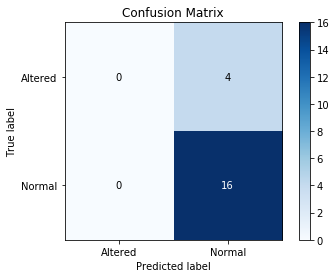

In [70]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=gbcy_pred)
plt.show()

In [ ]:
import _pickle as cPickle
# save the classifier
with open('fertility_classifier.pkl', 'wb') as fid:
    cPickle.dump(gbc, fid) 

In [ ]:
# load it again
with open('fertility_classifier.pkl', 'rb') as fid:
    gnb_loaded = cPickle.load(fid)